In [151]:
import numpy as np
from math import pow
from dataclasses import dataclass
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib notebook

In [152]:
arr = [[0.1, 0, 0, 0, 0, 0, 0, 0],
      [10, 5, 0, 77.23878, 0, 0, 0, 2],
      [0, 7, 9, 0, 76.48514, 0, 1, 0.1],
      [0, 5, 5, 0, 0, 97.12263, 2, 3]]
np.savetxt('нач_данные.csv', arr)

In [153]:
G = 6.67
@dataclass
class CosmicBody:
    mass: float = 0
    vec_v: np.ndarray = np.array([0, 0, 0])
    vec_r: np.ndarray = np.array([0, 0, 0])
    t: float = 0
    color: str = 'm'
    size: int = 5
    def gravitate(self, bodies: list):
        F = 0
        for i in range(len(bodies)):
            r = bodies[i].vec_r - self.vec_r
            abs_r = r[0]**2+r[1]**2+r[2]**2
            F+=G*self.mass*bodies[i].mass*r/pow(abs_r, 1.5)
        return F
    def destroy(self):
        self.mass = 0
        vec_v  = np.array([0, 0, 0])
        print(f"Было уничтожено тело в точке x = {vec_r[0]}, y = {vec_r[1]}, z = {vec_r[2]}")

In [163]:
@dataclass
class System:
    cosmic_bodies: list
    step_t: float = 0.0001
    def add(self, body: CosmicBody):
        self.cosmic_bodies.append(body)
    def step(self):
        delta_v_list = []
        for i in range(1, len(self.cosmic_bodies)):
            list_bodies = self.cosmic_bodies[:i] + self.cosmic_bodies[i+1:]
            delta_v = self.cosmic_bodies[i].gravitate(list_bodies)*self.step_t/self.cosmic_bodies[i].mass
            delta_v_list.append(delta_v)
        for i in range(1, len(self.cosmic_bodies)):
            self.cosmic_bodies[i].vec_r+=self.cosmic_bodies[i].vec_v*self.step_t+delta_v_list[i-1]*self.step_t**2/2
            self.cosmic_bodies[i].vec_v+=delta_v_list[i-1]
        for i in range(len(self.cosmic_bodies)):
            for j in range(len(self.cosmic_bodies)):
                if j != i:
                    r = self.cosmic_bodies[j].vec_r - self.cosmic_bodies[i].vec_r
                    abs_r = r[0]**2+r[1]**2+r[2]**2
                    if abs_r<=0.5:
                        self.cosmic_bodies[i].destroy()
                        self.cosmic_bodies[j].destroy()
                        self.cosmic_bodies.remove(self.cosmic_bodies[i])
                        self.cosmic_bodies.remove(self.cosmic_bodies[j])
    def visualize(self, bodies: list):
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')
        t0 = 10
        for t in tqdm(np.arange(0., t0, self.step_t)):
            angle = 60 + 60 * t / t0
            ax.clear()
            ax.axes.set_xlabel('x')
            ax.axes.set_ylabel('y')
            ax.axes.set_zlabel('z')
            ax.axes.set_xlim3d(-100, 100)
            ax.axes.set_ylim3d(-100, 100)
            ax.axes.set_zlim3d(-100, 100)
            for i in range(len(bodies)):
                # print("Тело", i, bodies[i])
                if abs(t - bodies[i].t)<0.00001 and bodies[i] not in self.cosmic_bodies:
                    self.add(bodies[i])
            list_x = [self.cosmic_bodies[i].vec_r[0] for i in range(len(self.cosmic_bodies))]
            list_y = [self.cosmic_bodies[i].vec_r[1] for i in range(len(self.cosmic_bodies))]
            list_z = [self.cosmic_bodies[i].vec_r[2] for i in range(len(self.cosmic_bodies))]
            # list_color = [self.cosmic_bodies[i].color for i in range(len(self.cosmic_bodies))] 
            list_size = [self.cosmic_bodies[i].size for i in range(len(self.cosmic_bodies))]
            ax.scatter(list_x, list_y, list_z, s = list_size)
            ax.view_init(30 - angle * 0.2, angle)
            fig.canvas.draw()
            self.step()

Сила притяжения высчитывается верно


<IPython.core.display.Javascript object>


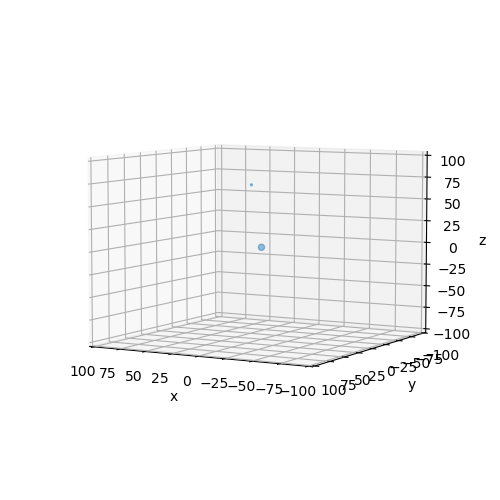

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.44it/s]


In [165]:
data = np.loadtxt('нач_данные.csv')
delta_t = data[0, 0]
sun = CosmicBody(mass = 10000, vec_r = np.array([0, 0, 0]), vec_v = np.array([0, 0, 0]), t = 0, color = 'y', size = 20)
body_1 = CosmicBody(mass = data[1, 7], vec_r = data[1, :3], vec_v = data[1, 3:6], t = data[1, 6], color = 'b', size = 5)
body_2 = CosmicBody(mass = data[2, 7], vec_r = data[2, :3], vec_v = data[2, 3:6], t = data[2, 6], color = 'r', size = 2)
body_3 = CosmicBody(mass = data[3, 7], vec_r = data[3, :3], vec_v = data[3, 3:6], t = data[3, 6], color = 'm', size = 7)
sun_system = System(cosmic_bodies = [sun], step_t = delta_t)
bodies = [body_1, body_2, body_3]
F = body_1.gravitate([sun])
if abs(F[0] + 954.5)<=0.1 and abs(F[1] + 477.3)<=0.1 and (F[2])<=0.1:
    print("Сила притяжения высчитывается верно")
else:
    print("Что-то не то")
sun_system.visualize(bodies)